# Random Sample Imputation

In [5]:
import pandas as pd
import os
os.chdir("C:\\Users\\EARABMO\\Desktop\\ERICSSON ITEMS\\DATA SCIENTIST\\PYTHON\\.ipynb_checkpoints\\")
os.getcwd()
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [8]:
df["Age"].isnull().sum()

177

In [32]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [34]:
df[df["Age"].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [54]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    

    

In [55]:
median=df.Age.median()

In [44]:
median

28.0

In [56]:
impute_nan(df,"Age",median)

In [51]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [69]:
import matplotlib.pyplot as plt
%matplotlib inline



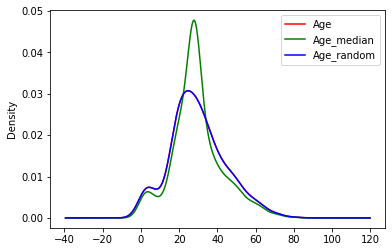

In [77]:
fig=plt.figure()
ax=fig.add_subplot(111)
df["Age"].plot(kind="kde",ax=ax,color="red")
df.Age_median.plot(kind="kde",ax=ax,color="green")
df.Age_random.plot(kind='kde', ax=ax, color='blue')
#Return handles and labels for legend
lines,labels=ax.get_legend_handles_labels()
#Place a legend on the axes.
ax.legend(lines,labels,loc="best")

# Capturing NAN values with a new feature

In [80]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [81]:
import numpy as np
df["Age_Nan"]=np.where(df["Age"].isnull(),1,0)

In [83]:
median=df.Age.median()

In [85]:
df.Age.fillna(median,inplace=True)

In [87]:
df.head(10)

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# End of Distribution imputation

In [128]:
import pandas as pd
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


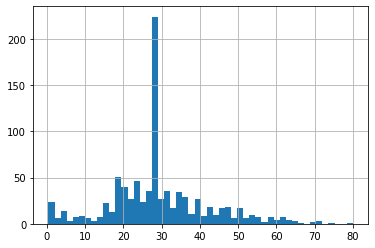

In [127]:
df.Age.hist(bins=50)

In [93]:
extreme=df.Age.mean()+3*df.Age.std()

In [95]:
extreme

73.27860964406095

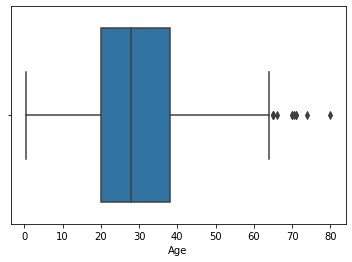

In [97]:
import seaborn as sns
sns.boxplot("Age",data=df)

In [129]:
#Replacing the nen value with extreme(Outliers):
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [130]:
#Replacing the nan value 
impute_nan(df,'Age',df.Age.median(),extreme)

In [131]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


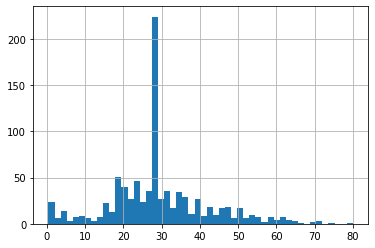

In [132]:
df.Age.hist(bins=50)

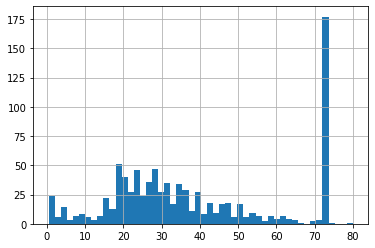

In [133]:
df['Age_end_distribution'].hist(bins=50)

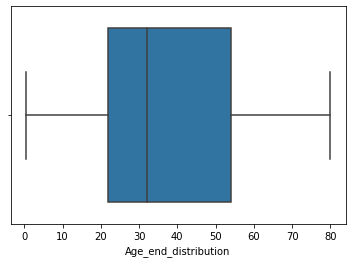

In [134]:
import seaborn as sns
sns.boxplot("Age_end_distribution",data=df)